In [1]:
import sys
sys.path.append('../sample/')
from metropolis_sampler import MetropolisSampler

from random import uniform, gauss
import numpy as np
import matplotlib.pyplot as plt

In [88]:
def initialize_state(dim):
  
    return np.array([uniform(-10, 10) for i in range(dim)])


def markov_process(x, step_length):

    result = x.copy()
    
    for i, item in enumerate(result):
        
        result[i] = item + gauss(0, 1) * step_length  
    
    return result

In [142]:
def N(mu, sigma):
    """ float * float -> ([float] -> float)
    """
    return lambda x: np.exp(- np.sum(np.square((x - mu) / sigma)))


## Recall SimulatedAnnealing is searching the argmin, instead of argmax.
def target_function(x):
    """ [float] -> float
    """
    return 1 * N(-5, 5)(x) + 10 * N(5, 5)(x)

def target_distribution(T):
    
    #return lambda x: np.exp(target_function(x) / T)
    return lambda x: target_function(x) ** T

In [143]:
def sampling(iterations, burn_in, dim, step_length, T):
    
    def initialize_state_0():
        return initialize_state(dim)

    ms = MetropolisSampler(iterations,
                           initialize_state_0,
                           lambda x: markov_process(x, step_length),
                           burn_in
                          )
    chains = ms.sampling(target_distribution(T))
    
    return chains

In [208]:
dim = 10

## Needs tuning
iterations = int(10 ** 4)
burn_in = int(0.3 * iterations)
step_length = 0.5
T = 1


chain = sampling(iterations, burn_in, dim, step_length, T)

expect = [sum([state[i] for state in chain]) / len(chain) for i in range(dim)]

print(expect)
print(chain[0])

accept-ratio = 0.8237
[4.4449994402543034, 5.3392579667004982, 4.7409586490643676, 4.444181873159236, 5.0507702157776455, 4.1096009324982941, 5.5018722706141618, 5.2339574427880207, 3.8971140686350894, 4.1508629332962776]
[  6.76345215   7.81033692   3.36333287  -0.18200631   4.54957597
  14.2095268    7.08570372   4.52569714   1.21760831   4.24212433]


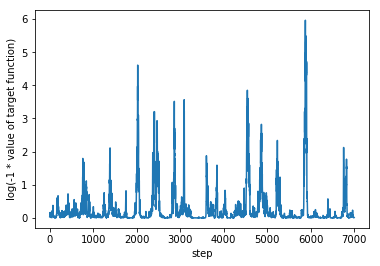

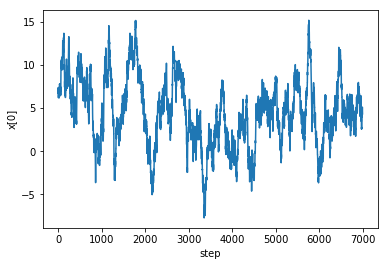

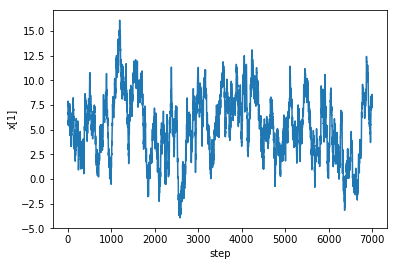

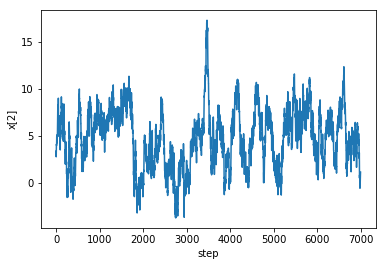

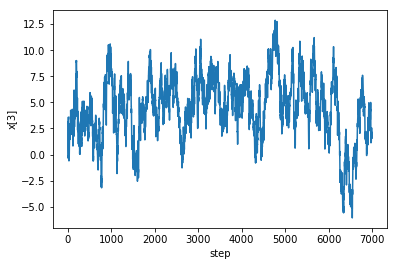

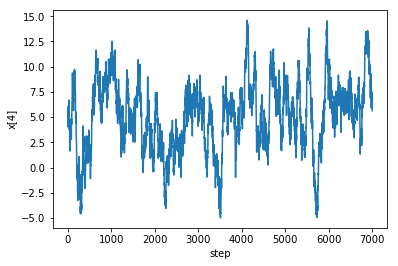

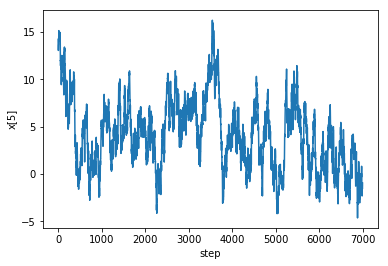

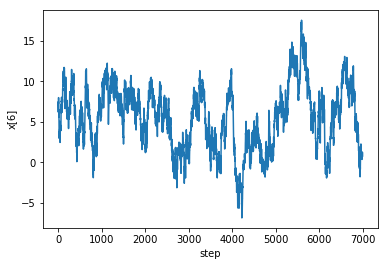

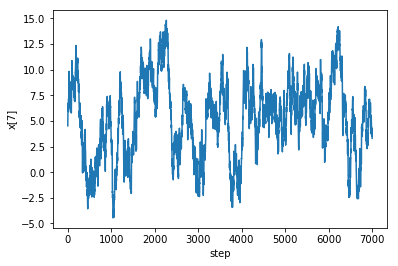

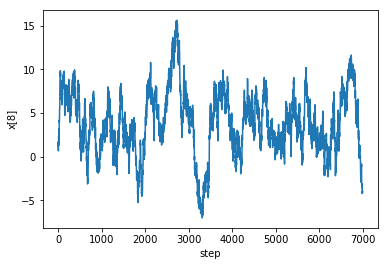

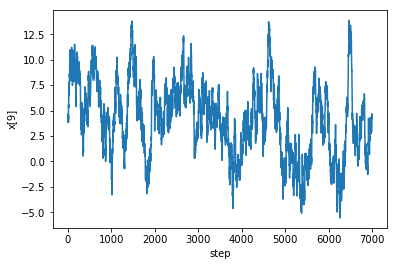

In [209]:
def t(x):
    return target_function(x)

step_list = np.arange(len(chain))
t_lst = [t(_) for _ in chain]


plt.plot(step_list, t_lst)
plt.xlabel('step')
plt.ylabel('log(-1 * value of target function)')
plt.show()


for i in range(dim):
    
    x_lst = [_[i] for _ in chain]

    plt.plot(step_list, x_lst)
    plt.xlabel('step')
    plt.ylabel('x[{0}]'.format(i))
    plt.show()

Splendid, even for `dim = 10`.